<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Box Plots**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize data composition and comparisons using box plots.


### Setup: Connecting to the Database


#### 1. Download the Database File


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-04-21 03:15:30--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-results-public.sqlite’

survey-results-publ 100%[===================>] 201.62M  63.0MB/s    in 3.2s    

2025-04-21 03:15:36 (62.8 MB/s) - ‘survey-results-public.sqlite’ saved [211415040/211415040]



#### 2. Connect to the Database


**Install the needed libraries**


In [2]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 148.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 145.3 MB/s eta 0:00:00


In [3]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 100.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 159.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 54.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 134.0 MB/s eta 0:00:00


In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')


## Demo: Basic SQL Queries


#### Demo 1: Count the Number of Rows in the Table


In [5]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


#### Demo 2: List All Tables


In [6]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


#### Demo 3: Group Data by Age


In [7]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Visualizing Data


### Task 1: Visualizing the Distribution of Data


**1. Box Plot of `CompTotal` (Total Compensation)**


Use a box plot to analyze the distribution and outliers in total compensation.


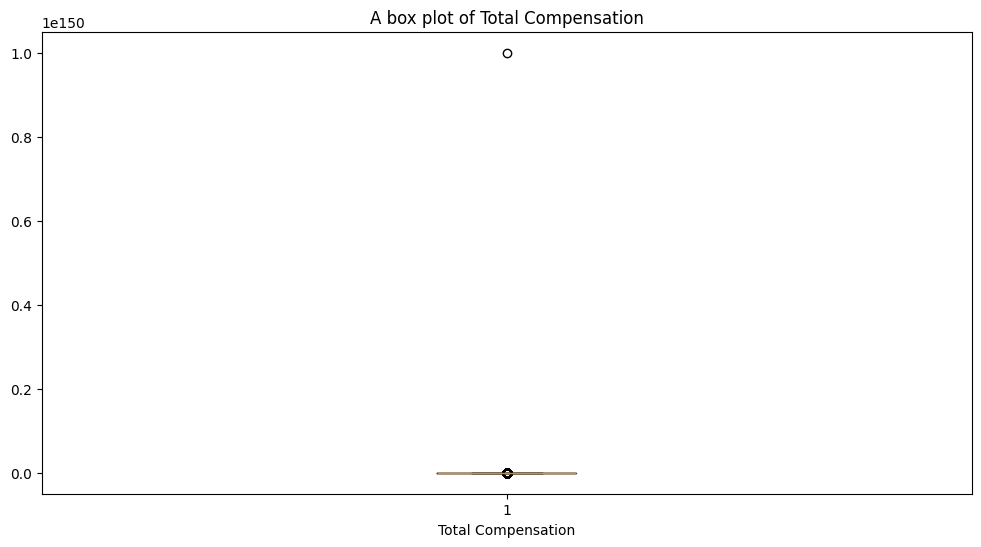

In [15]:
# your code goes here
query = """
select CompTotal from main
where CompTotal is not NULL
and CompTotal !=''
AND CompTotal !='NA'
"""
df = pd.read_sql_query(query, conn)
plt.figure(figsize=(12, 6))
plt.boxplot(df['CompTotal'])
plt.title('A box plot of Total Compensation')
plt.xlabel('Total Compensation')
plt.show()

**2. Box Plot of Age (converted to numeric values)**


Convert the `Age` column into numerical values and visualize the distribution.


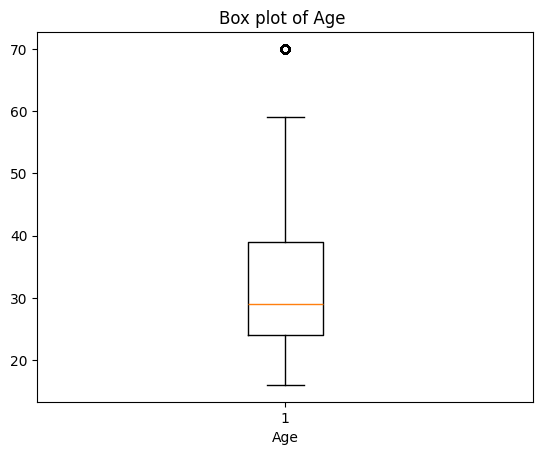

In [26]:
# your code goes here
df= pd.read_sql_query("""
select Age from main
where Age is not NULL
and Age !=''
and Age != 'NA'
""", conn)
agemap = {
'25-34 years old': 29,
'35-44 years old': 39,
'18-24 years old': 24,
'45-54 years old':49,
'55-64 years old':59,
'Under 18 years old':16,
'65 years or older': 70,
'Prefer not to say': None
}
df['AgeNum'] = df['Age'].map(agemap)
df = df[df['AgeNum'].notnull()]
plt.boxplot(df['AgeNum'])
plt.xlabel('Age')
plt.title('Box plot of Age ')
plt.show()

### Task 2: Visualizing Relationships in Data


**1. Box Plot of `CompTotal` Grouped by Age Groups:**


Visualize the distribution of compensation across different age groups.


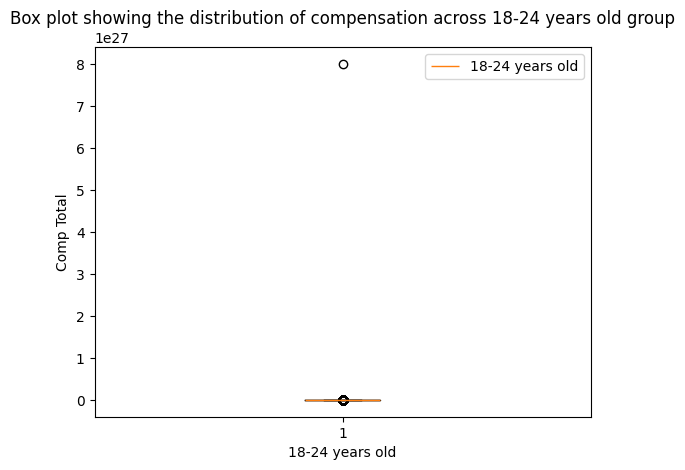

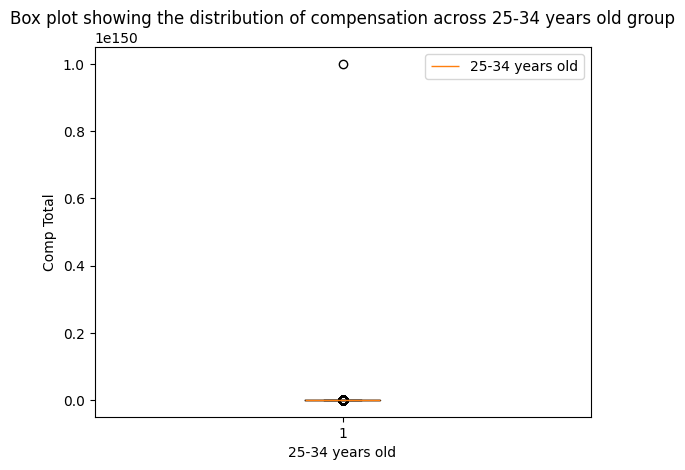

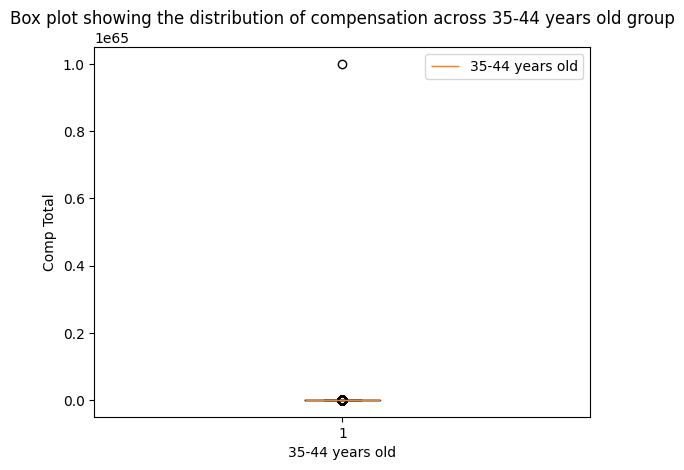

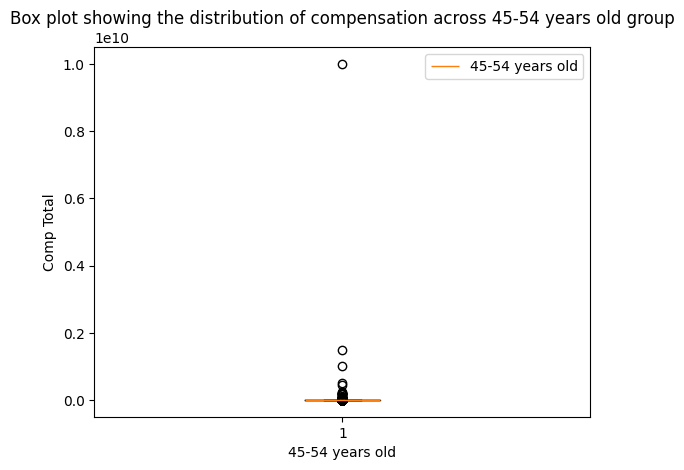

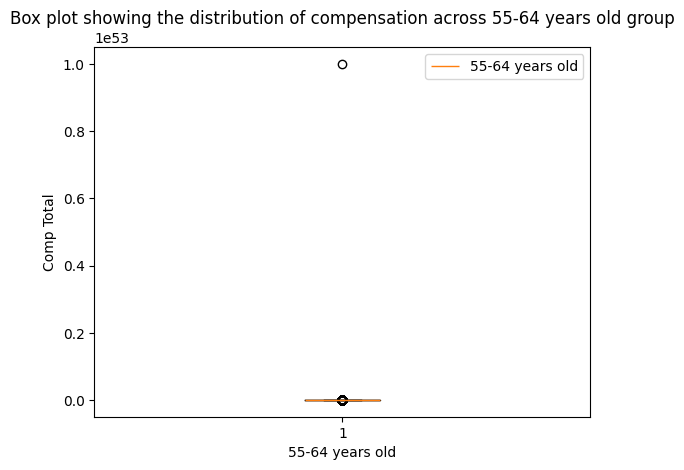

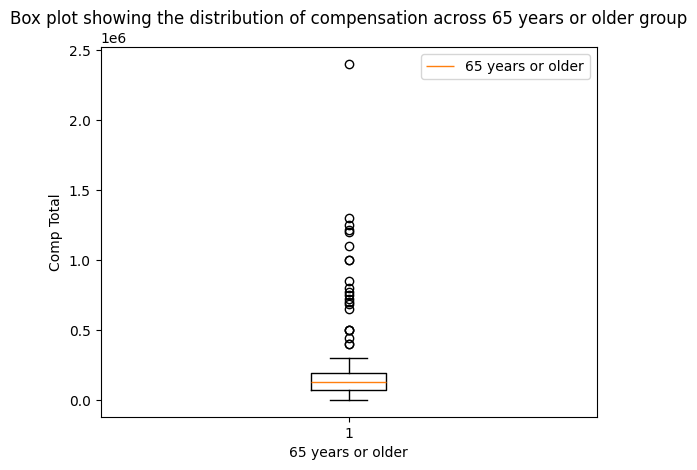

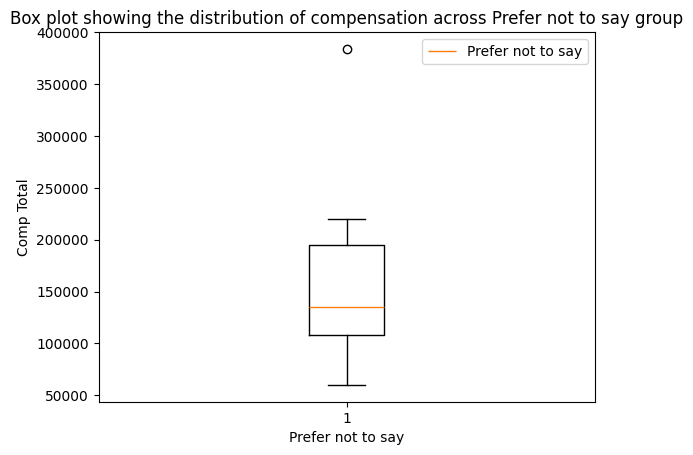

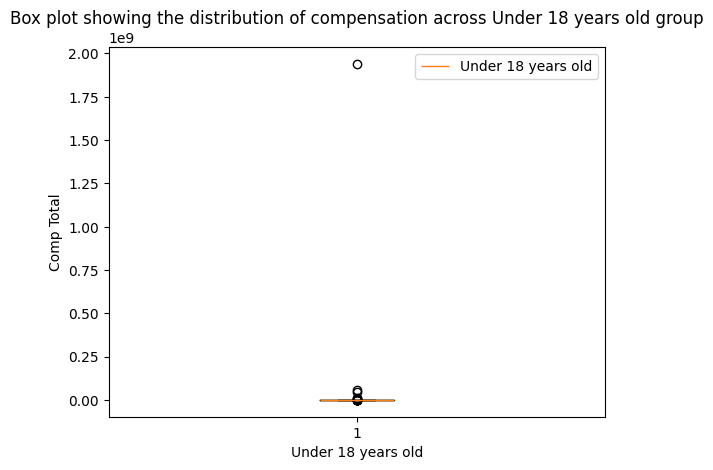

In [55]:
# your code goes here
dfComAge = pd.read_sql_query("""
select Age, CompTotal
from main
where CompTotal is not NULL and CompTotal !='' and CompTotal !='NA'
and Age is not NULL and Age !='' and Age !='NA'
""", conn)
dfComAge = dfComAge.dropna(subset=['CompTotal'])
agegroup = dfComAge.groupby('Age')
for name, group in agegroup:
    plt.boxplot(group['CompTotal'], label=name)
    plt.title(f"Box plot showing the distribution of compensation across {name} group")
    plt.legend()
    plt.xlabel(f"{name}")
    plt.ylabel('Comp Total')
    plt.show()

**2. Box Plot of `CompTotal` Grouped by Job Satisfaction (`JobSatPoints_6`):**


Examine how compensation varies based on job satisfaction levels.


<Figure size 1200x600 with 0 Axes>

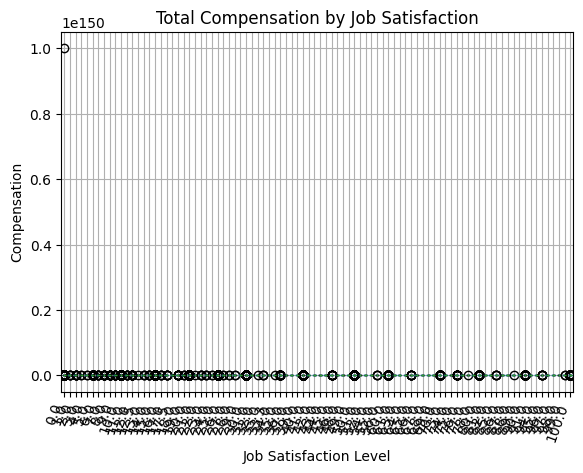

In [61]:
# your code goes here
plt.figure(figsize=(12, 6))
query_comp_by_job_sat = """
SELECT JobSatPoints_6, CompTotal 
FROM main 
WHERE JobSatPoints_6 IS NOT NULL AND CompTotal IS NOT NULL
"""
df_comp_by_job_sat = pd.read_sql_query(query_comp_by_job_sat, conn)
df_comp_by_job_sat.boxplot(column='CompTotal', by='JobSatPoints_6')
plt.title('Total Compensation by Job Satisfaction')
plt.suptitle('')  # Remove automatic suptitle
plt.xlabel('Job Satisfaction Level')
plt.xticks(rotation=70, ha= 'right')
plt.ylabel('Compensation')
plt.show()

### Task 3: Visualizing the Composition of Data


**1. Box Plot of `ConvertedCompYearly` for the Top 5 Developer Types:**


Analyze compensation across the top 5 developer roles.


<Figure size 1200x600 with 0 Axes>

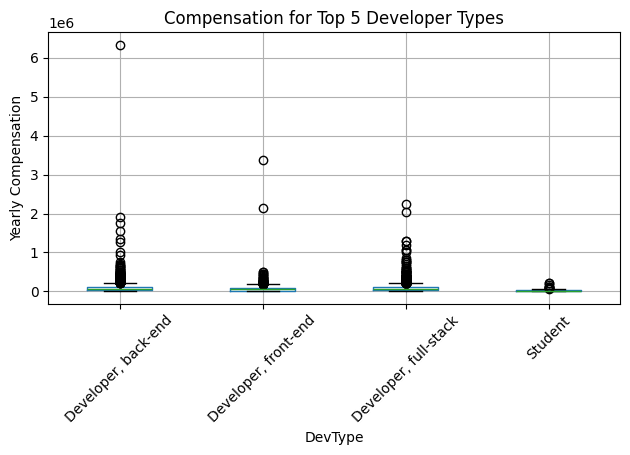

In [62]:
# your code goes here
plt.figure(figsize=(12, 6))
query_top_dev_types = """
SELECT DevType, ConvertedCompYearly 
FROM main 
WHERE DevType IS NOT NULL AND ConvertedCompYearly IS NOT NULL
AND DevType IN (
    SELECT DevType 
    FROM main 
    GROUP BY DevType 
    ORDER BY COUNT(*) DESC 
    LIMIT 5
)
"""
df_top_dev_types = pd.read_sql_query(query_top_dev_types, conn)
df_top_dev_types.boxplot(column='ConvertedCompYearly', by='DevType')
plt.title('Compensation for Top 5 Developer Types')
plt.suptitle('')  # Remove automatic suptitle
plt.ylabel('Yearly Compensation')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**2. Box Plot of `CompTotal` for the Top 5 Countries:**


Analyze compensation across respondents from the top 5 countries.


<Figure size 1200x600 with 0 Axes>

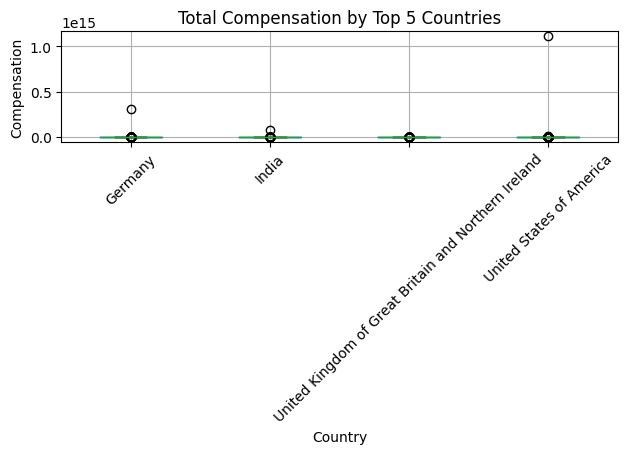

In [63]:
# your code goes here
plt.figure(figsize=(12, 6))
query_top_countries = """
SELECT Country, CompTotal 
FROM main 
WHERE Country IS NOT NULL AND CompTotal IS NOT NULL
AND Country IN (
    SELECT Country 
    FROM main 
    GROUP BY Country 
    ORDER BY COUNT(*) DESC 
    LIMIT 5
)
"""
df_top_countries = pd.read_sql_query(query_top_countries, conn)
df_top_countries.boxplot(column='CompTotal', by='Country')
plt.title('Total Compensation by Top 5 Countries')
plt.suptitle('')  # Remove automatic suptitle
plt.ylabel('Compensation')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Task 4: Visualizing Comparison of Data


**1. Box Plot of CompTotal Across Employment Types:**


Analyze compensation for different employment types.


/tmp/ipykernel_366/356399775.py:14: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 1200x600 with 0 Axes>

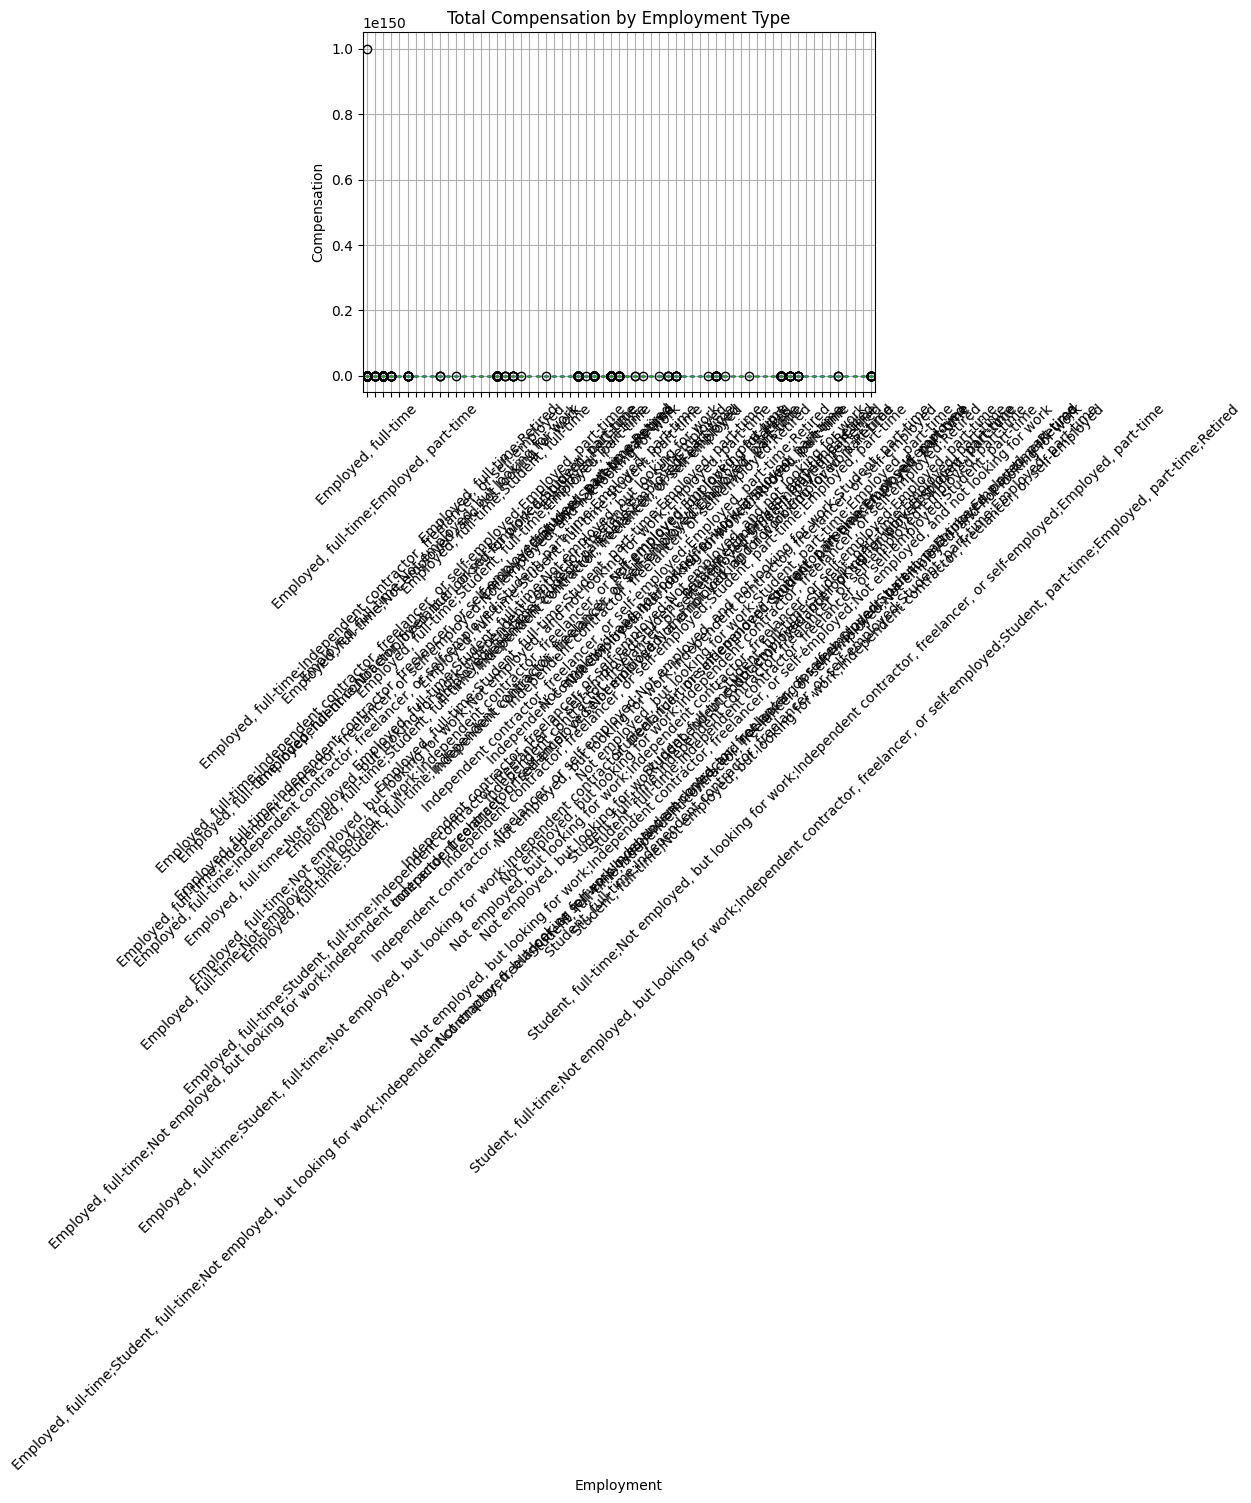

In [64]:
# your code goes here
plt.figure(figsize=(12, 6))
query_comp_by_emp_type = """
SELECT Employment, CompTotal 
FROM main 
WHERE Employment IS NOT NULL AND CompTotal IS NOT NULL
"""
df_comp_by_emp_type = pd.read_sql_query(query_comp_by_emp_type, conn)
df_comp_by_emp_type.boxplot(column='CompTotal', by='Employment')
plt.title('Total Compensation by Employment Type')
plt.suptitle('')  # Remove automatic suptitle
plt.ylabel('Compensation')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**2. Box Plot of `YearsCodePro` by Job Satisfaction (`JobSatPoints_6`):**


Examine the distribution of professional coding years by job satisfaction levels.


In [65]:
# your code goes here
query_years_by_job_sat = """
SELECT 
    JobSatPoints_6, 
    CAST(YearsCodePro AS NUMERIC) AS YearsCodePro 
FROM main 
WHERE 
    JobSatPoints_6 IS NOT NULL 
    AND YearsCodePro IS NOT NULL 
    AND YearsCodePro != ''
    AND CAST(YearsCodePro AS NUMERIC) >= 0
"""

# Read the data
df_years_by_job_sat = pd.read_sql_query(query_years_by_job_sat, conn)

# Ensure numeric conversion
df_years_by_job_sat['YearsCodePro'] = pd.to_numeric(df_years_by_job_sat['YearsCodePro'], errors='coerce')
df_years_by_job_sat['JobSatPoints_6'] = pd.to_numeric(df_years_by_job_sat['JobSatPoints_6'], errors='coerce')

# Remove any rows with NaN values
df_years_by_job_sat = df_years_by_job_sat.dropna()

# Create the box plot
plt.figure(figsize=(12, 6))
df_years_by_job_sat.boxplot(column='YearsCodePro', by='JobSatPoints_6')
plt.title('Professional Coding Years by Job Satisfaction')
plt.suptitle('')  # Remove automatic suptitle
plt.xlabel('Job Satisfaction Level')
plt.ylabel('Years of Professional Coding')
plt.tight_layout()
plt.show()
<F

SyntaxError: invalid syntax (172225281.py, line 33)

### Final Step: Close the Database Connection


After completing the lab, close the connection to the SQLite database:


In [ ]:
conn.close()

## Summary


In this lab, you used box plots to visualize various aspects of the dataset, focusing on:

- Visualize distributions of compensation and age.

- Explore relationships between compensation, job satisfaction, and professional coding experience.

- Analyze data composition across developer roles and countries.

- Compare compensation across employment types and satisfaction levels.

Box plots provided clear insights into the spread, outliers, and central tendencies of various features in the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
